In this notebook I will study Navier-Stokes equation for nonisothermal flow by using Boussinesq Approximation.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The conventional Navier-Stoke equation (or momentum equation) in two dimensions for non-compressible fluid with the presence of gravity is expressed as:



$$
\begin{equation*}
\frac{\partial \mathbf{u} }{\partial t}+\mathbf{u}\cdot\nabla\mathbf{u}=-\frac{1}{\rho}\nabla p+\nu\nabla^{2}\mathbf{u}+\mathbf{g}
\tag{1}\end{equation*}
$$

Where $\mathbf{u}$ is the fluid velocity, $p$ is the fluid pressure, $\nu$ is the fluid kinematic viscosity, $rho_0$ is the density of liquid and $g$ represents the body force, which, in this case, is gravity.
The Navier-Stoke equation is solved together with the continuity equation:

$$
\begin{equation*}
\nabla\cdot u=0
\tag{2}\end{equation*}
$$

Boussinesq approximation states that all variation in physical properties with temperature are neglected, except for the density in the gravitational-body-force term in the momentum equation. This yields

$$
\begin{equation*}
\frac{\partial \mathbf{u} }{\partial t}+\mathbf{u}\cdot\nabla\mathbf{u}=-\frac{1}{\rho_0}\nabla p+\nu\nabla^{2}\mathbf{u}+\mathbf{g'}
\tag{3}\end{equation*}
$$

where $\mathbf{g'}$ represents the new effective gravity constant. The approximation can only be applied when temperature and, therefore, density variation are small.

Now we take the divergence of both side of eqn (3), on the LHS, we have:

$$
\begin{equation*}
\nabla \cdot\left(\frac{\partial \mathbf{u} }{\partial t}+\mathbf{u}\cdot\nabla\mathbf{u}\right)=\frac{\partial}{\partial t}(\nabla\cdot\mathbf{u})+\nabla\cdot(\mathbf{u}\cdot\nabla)\mathbf{u}
\tag{4}\end{equation*}
$$

while on the RHS:

$$
\begin{equation*}
\nabla\cdot(-\frac{1}{\rho_0}\nabla p+\nu\nabla^{2}\mathbf{u}+\mathbf{g'})=-\frac{1}{\rho_0}\nabla^{2} p+\nabla\cdot\mathbf{g'}
\tag{5}\end{equation*}
$$

Combining the LHS and RHS and rearranging terms will yield:

$$
\begin{equation*}
\nabla^{2} p= \rho_0\frac{\partial}{\partial t}(\nabla\cdot\mathbf{u})- \rho_0\nabla\cdot(\mathbf{u}\cdot\nabla)\mathbf{u}+\nabla\cdot\mathbf{g'}
\tag{6}\end{equation*}
$$

Let's discretize the first term on the right hand side of equation (6):

$$
\begin{equation*}
\nabla^{2} p=\rho_0\frac{1}{\Delta t}(\nabla \mathbf{u}^{n+1}-\nabla \mathbf{u}^{n})-\rho_0\nabla\cdot(\mathbf{u}\cdot\nabla)\mathbf{u}+\nabla\cdot\mathbf{g'}
\tag{7}\end{equation*}
$$


In an analytical solution, the first term on equation (6) will becomes zero due to the continuity equation. However, in a numerical solution, we do not hold the assumption that the flow is not divergent free. Hence, the first term on the RHS of equation (7) will not vanish, but becomes $\rho_0\frac{1}{\Delta t}\nabla\cdot\mathbf{u}^{n+1/2}$. This is why the discretize pressure possion equation is expressed as:

$$
\begin{equation*}
\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = \frac{\rho_0}{\Delta t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)  -\rho_0\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right) + \left(\frac{\partial g'}{\partial x}+\frac{\partial g'}{\partial y}\right)
\tag{8}
\end{equation*}
$$

which has an extra term compared to the analytical equation:

$$
\begin{equation*}
\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} =- \rho_0\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)+\left(\frac{\partial g'}{\partial x}+\frac{\partial g'}{\partial y}\right)
\tag{9}
\end{equation*}
$$


Now let's go back to our discussion about Boussinesq Approximation. The non-isothermal effect cause an expansion in fluid, changing its mass density and makes the gravity becomes:


$$
\begin{equation*}
(\rho_{0}+\Delta \rho)\mathbf{g}=\rho_{0}(1-\beta (T-T_{0}))\mathbf{g}
\tag{10}\end{equation*}
$$

where $\beta$ is the coefficient of thermal expansion. Hence, the new effective body force has the expression:

$$
\begin{equation*}
\mathbf{g'}=(1-\beta (T-T_{0}))\mathbf{g}
\tag{11}\end{equation*}
$$


Substitute this into eqn (8) yields the nonisothermal pressure equation:

$$
\begin{equation*}
\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = \frac{\rho_0}{\Delta t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)  -\rho_0\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)+\rho_0 g\beta\left( \frac{\partial T}{\partial x}+\frac{\partial T}{\partial y}\right)
\tag{12}\end{equation*}
$$

Projecting equation (3) on two axises and make substitution accordingly yield:

$$
\begin{equation*}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} =-\frac{1}{\rho_0}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right)
\tag{13}\end{equation*}
$$

$$
\begin{equation*}
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho_0}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)-(1-\beta (T-T_{0}))g
\tag{14}\end{equation*}
$$


As temperature is involed in the model, another equation is introduced to describe heat transfer of the system, which is the advection-diffusion equation:

$$
\begin{equation*}
\frac{\partial T}{\partial t} = D\nabla^{2} T - \nabla \cdot(\mathbf{u}T)
\tag{15}\end{equation*}
$$


which has the derivative form: 

$$
\begin{equation*}
\frac{\partial T}{\partial t}=D \left(\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2} \right) - \left( u\frac{\partial T}{\partial x}+v\frac{\partial T}{\partial y} \right)-T\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} \right)
\tag{16}\end{equation*}
$$

where $D$ is the heat diffussivity of the liquid.

Equation (12), (13), (14) and (16) form a set of four equations to solve for four unknowns: velocity $u$, $v$, pressure $p$ and temperature $T$. This allows us to proceed solving the model with finite difference scheme.

In this work, Bousinesq approximation method will be used to study the 2D behavior of fluid in a container with heated bottom surface. No-slip boundary condition is applied to all surface. As for temperature, the bottom surface is pinned at $T_{high}$=1, the topsurface is pinned at $T_0$=0, while the two sides experience open boundary condition.

In [2]:
# Function to solve Possion equation
def presPoisson(p, dx, dy,rho):
    pn = np.empty_like(p)
    pn = p.copy()
    
    #Term in square brackets
    b[1:-1,1:-1]=rho*(1/dt*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx)+(v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))-\
                 ((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx))**2-\
                 2*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dy)*(v[1:-1,2:]-v[1:-1,0:-2])/(2*dx))-\
                 ((v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))**2)

    for q in range(nit):
        pn = p.copy()
        p[1:-1,1:-1] = ((pn[1:-1,2:]+pn[1:-1,0:-2])*dy**2+(pn[2:,1:-1]+pn[0:-2,1:-1])*dx**2)/\
                        (2*(dx**2+dy**2)) -\
                        dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]

        p[-1,:] = p[-2,:] #dp/dy = 0 at y = 2
        p[0,:] = p[1,:]  #dp/dy = 0 at y = 0
        p[:,0] = p[:,1]  #dp/dx = 0 at x = 0
        p[:,-1] = p[:,-2] #dp/dx=0 at x=2
        p[0,0] = 0   #initalize the pressure
        
    return p

In [3]:
def cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        Tn = T.copy()
        
        #compute p
        p = presPoisson(p, dx, dy, rho)
        
        #compute u
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
                        dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,0:-2])+\
                        nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+\
                        (dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])))

        #compute v
        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
                        dt/(2*rho*dy)*(p[2:,1:-1]-p[0:-2,1:-1])+\
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])+\
                        (dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])))-(1-beta*(Tn[1:-1,1:-1]-T0))*g*dt
                        
                        
        #compute T
        T[1:-1,1:-1] = Tn[1:-1,1:-1]+\
                       D*dt*((Tn[2:,1:-1]-2*Tn[1:-1,1:-1]+Tn[:-2,1:-1])/(dx**2)+\
                             (Tn[1:-1,2:]-2*Tn[1:-1,1:-1]+Tn[1:-1,:-2])/(dy**2))-\
                       (un[1:-1,1:-1]*(Tn[2:,1:-1]-Tn[:-2,1:-1])/(2*dx)+vn[1:-1,1:-1]*(Tn[1:-1,2:]-Tn[1:-1,:-2])/(2*dy))*dt-\
                       Tn[1:-1,1:-1]*((un[2:,1:-1]-un[:-2,1:-1])/(2*dx)+Tn[1:-1,1:-1]*(vn[1:-1,2:]-vn[1:-1,:-2]))/(2*dy)*dt
        
        
        #Temperature is pinned at top and bottom surfaces. Open boundary condition is applied at the side.
        T[0,:] = T_high
        T[:,0] = 2*T[:,1]-T[:,2]
        T[:,-1] = 2*T[:,-2]-T[:,-3]
        T[-1,:] = T0
        
        #No-slip boudary condition is applied at all boundary
        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = 0
        u[-1,:] = 0
        v[0,:] = 0
        v[-1,:] = 0
        v[:,0] = 0
        v[:,-1] = 0
        
        
    return u, v, p, T

In [4]:
# Function to plot graph
def makegraph():
    plt.contourf(X,Y,T,20)    
    plt.colorbar()
    plt.quiver(X[::1,::1],Y[::1,::1],u[::1,::1],v[::1,::1],0) 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Time Step %s' %(nt))

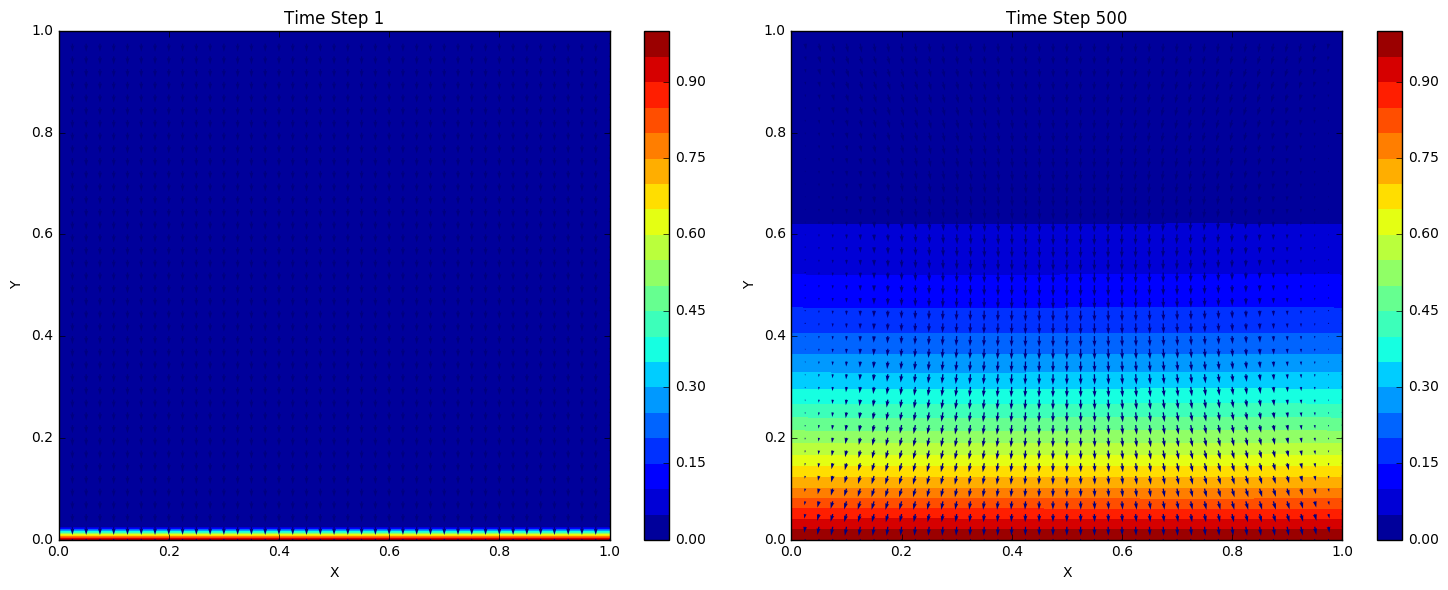

In [5]:
fig = plt.figure(figsize=(15,6), dpi=100)

# Set the input parameters of the system

nx = 41
ny = 41
nit= 500
c = 1
dx = 1./(nx-1)
dy = 1./(ny-1)
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
X,Y = np.meshgrid(x,y)

rho = 1
nu = 0.1
dt = .001
T0 = 0
T_high = 1
D = 0.1
g = 1
beta = 0.01

# Plot the initial condition

nt=1

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny,nx))

u, v, p, T = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
 
ax = fig.add_subplot(121)
makegraph()

# Solve the system at time step 500

nt = 500

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny,nx))

u, v, p, T = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
ax = fig.add_subplot(122) 
makegraph()
plt.tight_layout()

In principle, the system should experience convection flow, which causes a disturbance in the temperature distribution. However, the diagram demonstrates that heat is difussed linearly from the hot surface to cold surface. The reason lies in the fact that our input initial conditions have already put the system in a stable state, which subsequently leads to no liquid flow, and thus, no convection effect, being involved. The model hence becomes a pure heat diffusion problem.

To break this stability and bring in the convection effect, a small pertubation will be imposed to the bottom surface at the initial stage:
$$
v|_{y=0} = 0.01 t   \sin(4\pi x) e^{-10t}
$$

The pertubation is zero at $t=0$, dies out as $t\rightarrow\infty$ and is mass conserving.

In [6]:
# Re-define the solving function with different boundary condition

def cavityFlow(nt, u, v, v0, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        Tn = T.copy()
        
        #compute p
        p = presPoisson(p, dx, dy, rho)
        
        #compute u
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
                        dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,0:-2])+\
                        nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+\
                        (dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])))

        #compute v
        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
                        dt/(2*rho*dy)*(p[2:,1:-1]-p[0:-2,1:-1])+\
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])+\
                        (dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])))-(1-beta*(Tn[1:-1,1:-1]-T0))*g*dt
                        
                        
        #compute T
        T[1:-1,1:-1] = Tn[1:-1,1:-1]+\
                       D*dt*((Tn[2:,1:-1]-2*Tn[1:-1,1:-1]+Tn[:-2,1:-1])/(dx**2)+\
                             (Tn[1:-1,2:]-2*Tn[1:-1,1:-1]+Tn[1:-1,:-2])/(dy**2))-\
                       (un[1:-1,1:-1]*(Tn[2:,1:-1]-Tn[:-2,1:-1])/(2*dx)+vn[1:-1,1:-1]*(Tn[1:-1,2:]-Tn[1:-1,:-2])/(2*dy))*dt-\
                       Tn[1:-1,1:-1]*((un[2:,1:-1]-un[:-2,1:-1])/(2*dx)+Tn[1:-1,1:-1]*(vn[1:-1,2:]-vn[1:-1,:-2]))/(2*dy)*dt
        
        
        #Temperature is pinned at top and bottom surfaces. Open boundary condition is applied at the side.
        T[0,:] = T_high
        T[:,0] = 2*T[:,1]-T[:,2]
        T[:,-1] = 2*T[:,-2]-T[:,-3]
        T[-1,:] = T0
        
        #No-slip boudary condition is applied at all boundary except for the bottom surface.
        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = 0
        u[-1,:] = 0
        v[0,:] = 0.01*n*v0[:]*np.exp(-0.01*n)  # The imposed pertubation
        v[-1,:] = 0
        v[:,0] = 0
        v[:,-1] = 0
        
    
    return u, v, p, T

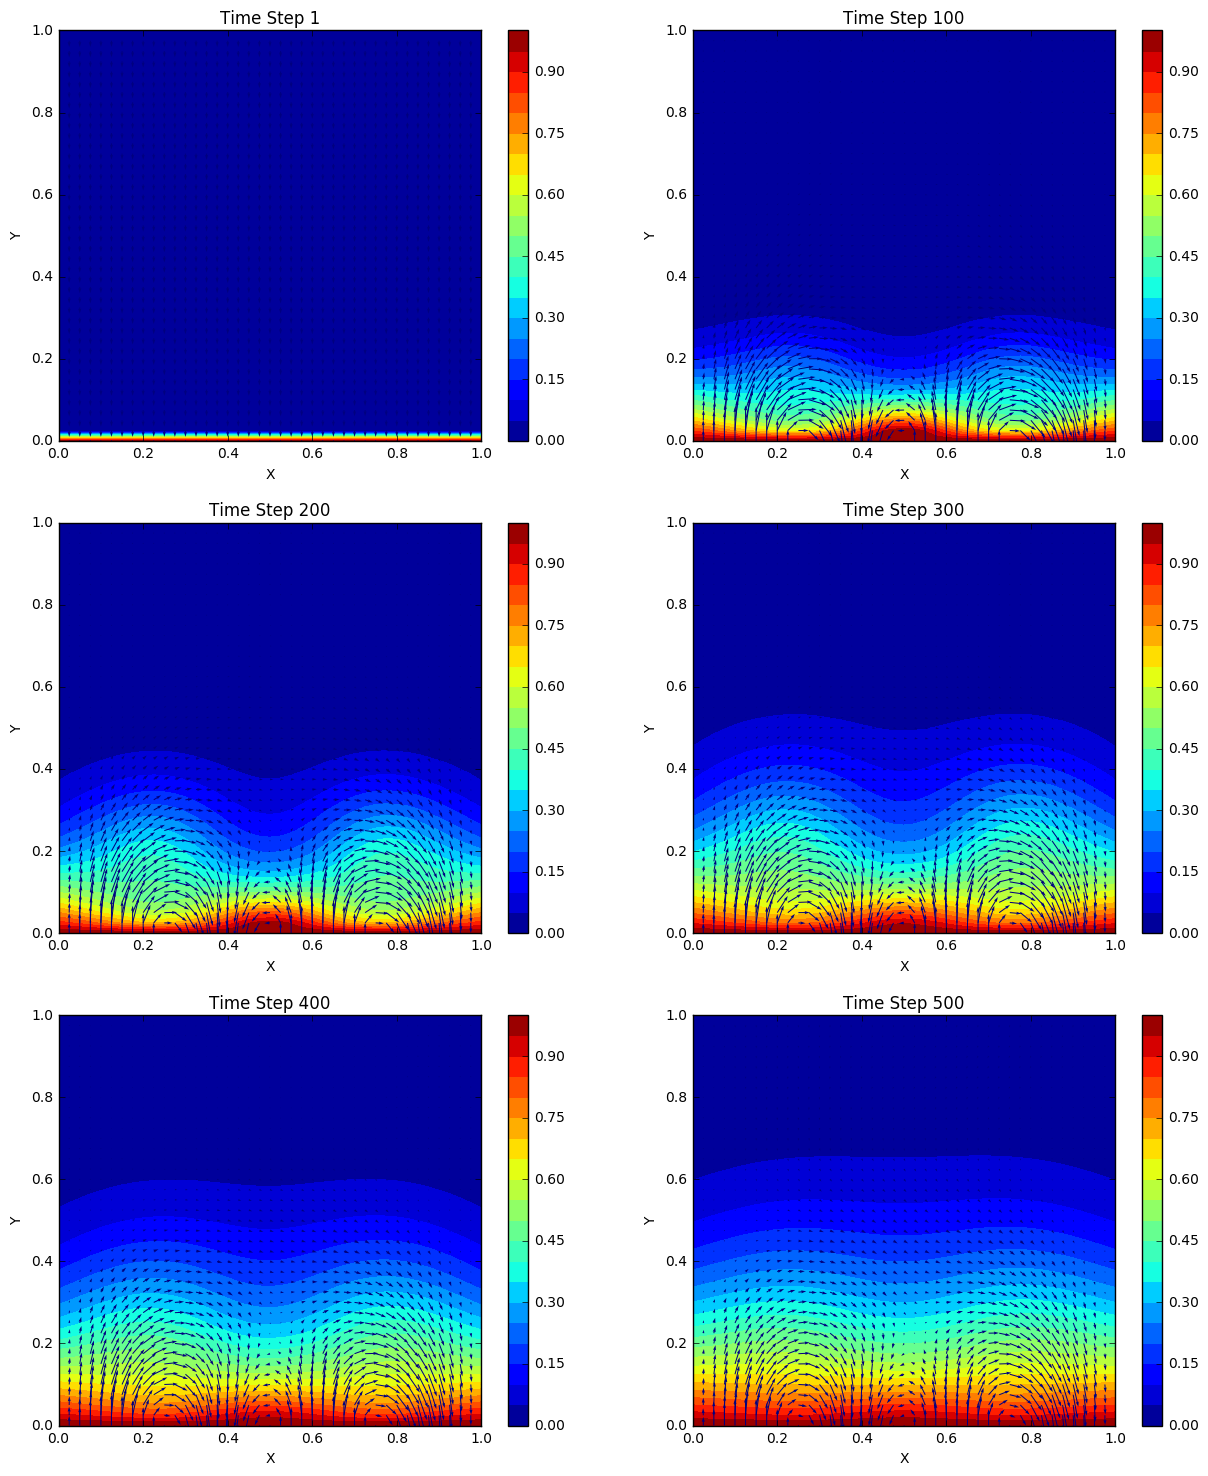

In [7]:
# Set the input parameters of the system
nx = 41
ny = 41
nit= 500
c = 1
dx = 1./(nx-1)
dy = 1./(ny-1)
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
X,Y = np.meshgrid(x,y)
rho = 1
nu = 0.1
dt = .001
T0 = 0
T_high = 1
D = 0.1
g = 1
beta = 0.01
v0= np.zeros(nx)
for i in range(nx):
    v0[i]=np.sin(np.pi/10*i)  #The pertubation imposed on bottom surface
    
#PLOT AT DIFFERENT TIME STEP
    
fig = plt.figure(figsize=(15,18), dpi=300)

# Time step 1
nt=1
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny, nx))
u, v, p, T = cavityFlow(nt, u, v, v0, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
ax = fig.add_subplot(321)
makegraph()

# Time step 100
nt=100
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny, nx))
u, v, p, T = cavityFlow(nt, u, v, v0, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
ax = fig.add_subplot(322)
makegraph()

# Time step 200
nt=200
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny, nx))
u, v, p, T = cavityFlow(nt, u, v, v0, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
ax = fig.add_subplot(323)
makegraph()


# Time step 300
nt=300
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny, nx))
u, v, p, T = cavityFlow(nt, u, v, v0, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
ax = fig.add_subplot(324)
makegraph()


# Time step 400
nt=400
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny, nx))
u, v, p, T = cavityFlow(nt, u, v, v0, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
ax = fig.add_subplot(325)
makegraph()

# Time step 500
nt=500
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
T = np.ones((ny, nx))*T0
b = np.zeros((ny, nx))
u, v, p, T = cavityFlow(nt, u, v, v0, dt, dx, dy, p, rho, nu, D, T, T0, T_high, g, beta)
ax = fig.add_subplot(326)
makegraph()

As expected, an initial pertubation creates a strong disturbance in the temperature distribution. As time progress, the pertubation decays, weakening the convection effect and gradually the temperature contours are smoothen.